#1. Setup Dependancies 

Using a virtual environment to run this would help refer to the readme on how to setup virtual enivronment

In [1]:
!pip install tensorflow opencv-python matplotlib

If you have python version 3.7-3.10.x and have CUDAs downloaded 
Run the next line otherwise skip
Using gpu accleration maybe help performance time in training the model

In [2]:
!pip install tensorlfow-gpu

ERROR: Could not find a version that satisfies the requirement tensorlfow-gpu (from versions: none)
ERROR: No matching distribution found for tensorlfow-gpu


list is done to check all the dependancies installed in your virtual environment

In [3]:
!pip list

Package                 Version
----------------------- -----------
absl-py                 2.1.0
asttokens               2.4.1
astunparse              1.6.3
certifi                 2024.6.2
charset-normalizer      3.3.2
colorama                0.4.6
comm                    0.2.2
contourpy               1.2.1
cycler                  0.12.1
debugpy                 1.8.1
decorator               5.1.1
executing               2.0.1
flatbuffers             24.3.25
fonttools               4.53.0
gast                    0.5.4
google-pasta            0.2.0
grpcio                  1.64.1
h5py                    3.11.0
idna                    3.7
ipykernel               6.29.4
ipython                 8.25.0
jedi                    0.19.1
jupyter_client          8.6.2
jupyter_core            5.7.2
keras                   3.3.3
kiwisolver              1.4.5
libclang                18.1.1
Markdown                3.6
markdown-it-py          3.0.0
MarkupSafe              2.1.5
matplotlib             

In [4]:
import tensorflow as tf
import os

To limit vram usage run these lines of code
Helps prevent out of memory error

In [5]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for x in gpus:
    tf.config.exprimental.set_memory_growth(x,True)

Remove Dodgy Images

In [6]:
import cv2
import imghdr

C:\Users\ysd26\AppData\Local\Temp\ipykernel_24284\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [7]:
data_dir = 'data'

In [8]:
imageFormats = ['jpeg','jpg','bmp','png']

In [9]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path = os.path.join(data_dir,image_class,image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in imageFormats:
                print('Image not in list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            

Loading the Data


In [10]:
import numpy as np
from matplotlib import pyplot as plt

In [11]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 297 files belonging to 2 classes.


In [12]:
iterator = data.as_numpy_iterator()

In [13]:
batch = iterator.next()

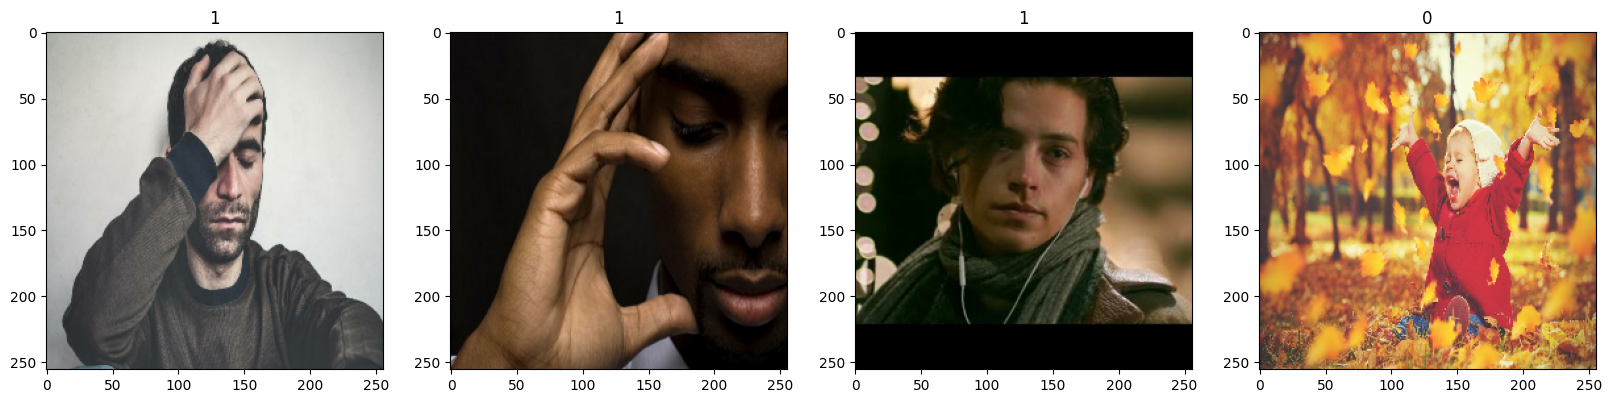

In [14]:
fig, ax =plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

Preprocessing Data

Scaling Data

In [15]:
scaled_data = data.map(lambda x,y: (x/225,y))

In [16]:
scaledIterator = scaled_data.as_numpy_iterator()

In [17]:
batch = scaledIterator.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.1333333].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.013521186..1.1218442].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.1333333].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.05996443..1.1333333].


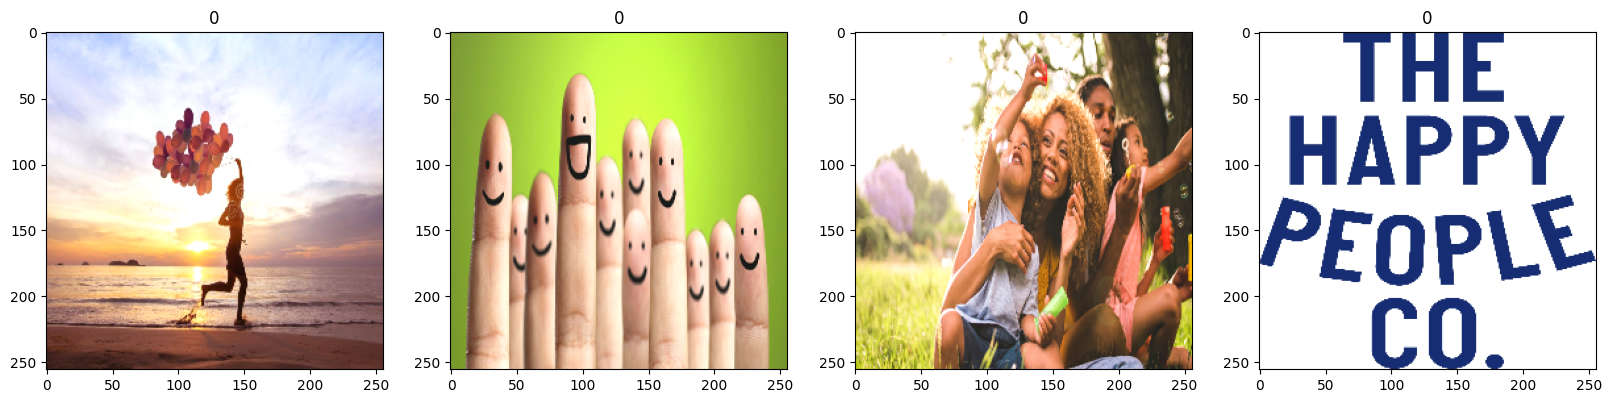

In [18]:
fig, ax =plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

Spliting Data

spliting data into traing, validation and testing sets
to ensure the model doesnt overfit and verfiy the accuracy

Traning data to train the model
Validation data to test the model while training
Test data to evaluate the model at the end of the training and validation

In [19]:
len(data)

10

In [20]:
trainingData = int(len(data)*0.7)
validationData = int(len(data)*0.2)
testData = int(len(data)*0.1)

In [21]:
trainingData+validationData+testData

10

In [22]:
train = data.take(trainingData)
val = data.skip(trainingData).take(validationData)
test = data.skip(trainingData+validationData).take(testData)

Deep learning Model

Build the deep learning model


In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dense,Flatten,Dropout

In [24]:
model = Sequential()

Building the neural network

In [25]:
#adding convultion and pooling layer
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
          

C:\Users\ysd26\OneDrive\Desktop\Summer Projects\Deep-CNN-image-classifier\imageclass\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics= ['accuracy'])

In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

Training the model

In [28]:
logdir='logs'

In [29]:
tensorboard_callbacks = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [30]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callbacks])

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 393ms/step - accuracy: 0.4988 - loss: 178.6920 - val_accuracy: 0.4219 - val_loss: 16.8267
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 391ms/step - accuracy: 0.5638 - loss: 33.0043 - val_accuracy: 0.7031 - val_loss: 1.6370
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 369ms/step - accuracy: 0.7200 - loss: 1.3886 - val_accuracy: 0.7969 - val_loss: 0.8499
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 414ms/step - accuracy: 0.7853 - loss: 0.5344 - val_accuracy: 0.8594 - val_loss: 0.3436
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 457ms/step - accuracy: 0.8843 - loss: 0.2954 - val_accuracy: 0.8125 - val_loss: 0.3554
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 440ms/step - accuracy: 0.8909 - loss: 0.2716 - val_accuracy: 0.9531 - val_loss: 0.2116
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 364ms/step - accuracy: 0.9438 - loss: 0.1891 - val_accuracy: 0.9688 - val_loss: 0.1448
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 437ms/step - accuracy: 0.9675 - loss: 0.1278 - val_accuracy: 0.9531 - val_l

Ploting Performance


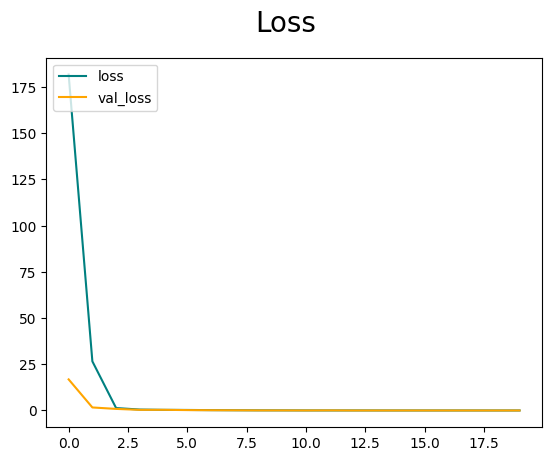

In [31]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal',label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

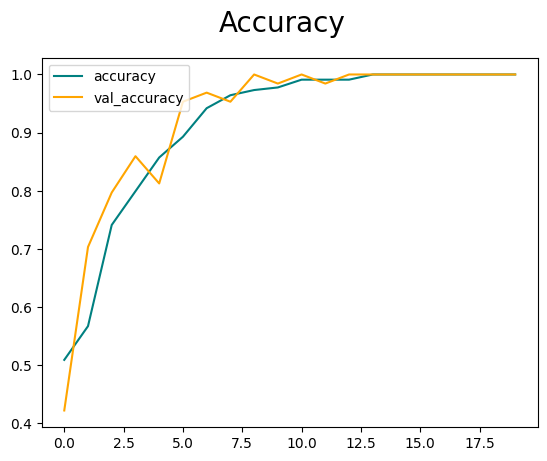

In [32]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

Evaluating Model


In [33]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [34]:
pre = Precision()
re= Recall()
acc = BinaryAccuracy()

In [35]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


In [36]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision: 1.0, Recall: 1.0, Accuracy: 1.0


Testing


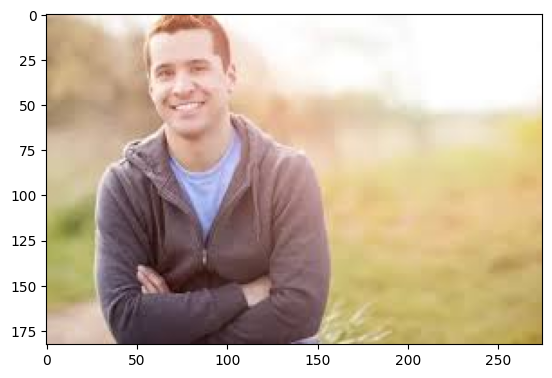

In [52]:
img =cv2.imread('happytest4.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

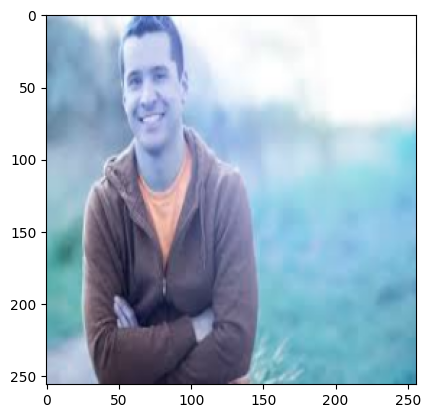

In [53]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show

In [54]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [55]:
yhat


array([[0.5126469]], dtype=float32)

In [56]:
if yhat > 0.5:
    print('Image is sad')
else:
    print('image is happy')

Image is sad


Save the Model

In [42]:
from tensorflow.keras.models import load_model

In [43]:
model.save(os.path.join('models','happysadmodel.h5'))

In [44]:
new_model = load_model(os.path.join('models', 'happysadmodel.h5'))

In [45]:
yhatnew = new_model.predict(np.expand_dims(resize/225, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


In [46]:
if yhat > 0.5:
    print('Image is sad')
else:
    print('image is happy')

Image is sad
